In [8]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from train_model import indicatorMatrix
import matplotlib.pyplot as plt
from get_data import prepare_data_to_next_step as gd
from math import ceil

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
def error_rate(p,y):
    return np.mean( p != y)

In [35]:
def model(l_rate, n_iter, path, batch_size, h1, h2): 
    X_train, Y_train, X_test, Y_test = gd(path, -1)
    
    M, NX = X_train.shape
    n_batch = ceil(M/batch_size)
    test_indicatorMatrix = indicatorMatrix(Y_test)
    train_indicatorMatrix = indicatorMatrix(Y_train)
    K = train_indicatorMatrix.shape[1]
    
    W1_0 = np.random.randn(NX,h1) / np.sqrt(21)
    b1_0 = np.zeros(h1)
    W2_0 = np.random.randn(h1,h2) / np.sqrt(h1)
    b2_0 = np.zeros(h2)
    W3_0 = np.random.randn(h2,K) / np.sqrt(h2)
    b3_0 = np.zeros(K)
    
    X = tf.placeholder(tf.float32, shape = (None, NX), name = 'X')
    T = tf.placeholder(tf.float32, shape = (None, K), name = 'T')
    W1 = tf.Variable(W1_0.astype(np.float32))
    b1 = tf.Variable(b1_0.astype(np.float32))
    W2 = tf.Variable(W2_0.astype(np.float32))
    b2 = tf.Variable(b2_0.astype(np.float32))
    W3 = tf.Variable(W3_0.astype(np.float32))
    b3 = tf.Variable(b3_0.astype(np.float32))
    
    Z1 = tf.nn.relu( tf.matmul(X, W1) + b1)
    Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2)
    Z3_passive = tf.matmul(Z2, W3) + b3
    
    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = Z3_passive, labels = T))
    
    train_model = tf.train.RMSPropOptimizer(l_rate, decay = 0.99, momentum = 0.9).minimize(cost)
    predict = tf.argmax(Z3_passive,1)
    
    LL = []
    init = tf.initialize_all_variables()
    
    with tf.Session() as s:
        s.run(init)
        for i in range(n_iter):
            for j in range(n_batch):
                Xbatch = X_train[ j*batch_size : (j+1)*batch_size,]
                Ybatch = train_indicatorMatrix[ j*batch_size : (j+1)*batch_size,]
                s.run(train_model, feed_dict = {X: Xbatch, T: Ybatch})
                if j%10 == 0:
                    current_cost = s.run(cost, feed_dict = {X: X_test, T: test_indicatorMatrix})
                    prediction = s.run(predict, feed_dict = {X: X_test})
                    err = error_rate(prediction, Y_test)
                    print(f"Iteration of [i,j] : [{i},{j}] Cost : {current_cost:.3f} Error: {err:.3f}")
                    LL.append(err)
    plt.plot(LL, label = "Error rate")
    plt.title(f"Error Rate of Model in {n_iter} Iterations")

Shape of data is (2000, 21)
Lenght of data is 2000
Split will occur after index of 1400...
Iteration of [i,j] : [0,0] Cost : 886.716 Error: 0.818
Iteration of [i,j] : [0,10] Cost : 734.287 Error: 0.550
Iteration of [i,j] : [1,0] Cost : 672.372 Error: 0.492
Iteration of [i,j] : [1,10] Cost : 517.817 Error: 0.397
Iteration of [i,j] : [2,0] Cost : 462.298 Error: 0.322
Iteration of [i,j] : [2,10] Cost : 356.959 Error: 0.218
Iteration of [i,j] : [3,0] Cost : 325.821 Error: 0.192
Iteration of [i,j] : [3,10] Cost : 267.367 Error: 0.145
Iteration of [i,j] : [4,0] Cost : 248.561 Error: 0.142
Iteration of [i,j] : [4,10] Cost : 210.553 Error: 0.098
Iteration of [i,j] : [5,0] Cost : 199.509 Error: 0.093
Iteration of [i,j] : [5,10] Cost : 175.381 Error: 0.090
Iteration of [i,j] : [6,0] Cost : 168.882 Error: 0.088
Iteration of [i,j] : [6,10] Cost : 152.603 Error: 0.085
Iteration of [i,j] : [7,0] Cost : 148.264 Error: 0.073
Iteration of [i,j] : [7,10] Cost : 136.572 Error: 0.078
Iteration of [i,j] : 

Iteration of [i,j] : [76,10] Cost : 202.963 Error: 0.082
Iteration of [i,j] : [77,0] Cost : 202.507 Error: 0.080
Iteration of [i,j] : [77,10] Cost : 204.590 Error: 0.082
Iteration of [i,j] : [78,0] Cost : 204.040 Error: 0.080
Iteration of [i,j] : [78,10] Cost : 206.163 Error: 0.082
Iteration of [i,j] : [79,0] Cost : 205.662 Error: 0.080
Iteration of [i,j] : [79,10] Cost : 207.634 Error: 0.082
Iteration of [i,j] : [80,0] Cost : 207.089 Error: 0.082
Iteration of [i,j] : [80,10] Cost : 209.135 Error: 0.082
Iteration of [i,j] : [81,0] Cost : 208.679 Error: 0.082
Iteration of [i,j] : [81,10] Cost : 210.833 Error: 0.082
Iteration of [i,j] : [82,0] Cost : 210.250 Error: 0.082
Iteration of [i,j] : [82,10] Cost : 212.100 Error: 0.082
Iteration of [i,j] : [83,0] Cost : 211.568 Error: 0.082
Iteration of [i,j] : [83,10] Cost : 213.817 Error: 0.082
Iteration of [i,j] : [84,0] Cost : 213.384 Error: 0.082
Iteration of [i,j] : [84,10] Cost : 215.344 Error: 0.082
Iteration of [i,j] : [85,0] Cost : 214.

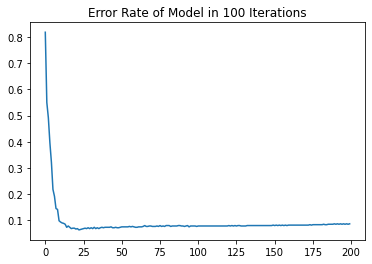

In [36]:
model(0.0003, 100, "train.csv", 100, 128, 64)